# Objective:
#Analyze a dataset of student exam scores and answer specific questions, presenting findings using Python libraries and techniques for data analysis.


---



# Importing Libraries

---










In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 # STEP 1 : Load The Dataset

---







In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
dataset_path = "student-mat.csv"

# Download And Load The Dataset

---



In [5]:
import urllib.request
import zipfile

# Download The Dataset

---



In [6]:
urllib.request.urlretrieve(url, "student.zip")

('student.zip', <http.client.HTTPMessage at 0x7a8ba5583010>)

# Extract The Dataset

---



In [7]:
with zipfile.ZipFile("student.zip","r") as zip_ref:
     zip_ref.extractall(".")

# Load The Data Into DataFrame

---



In [9]:
data = pd.read_csv("student-mat.csv", sep = ";")
print("Data loaded successfully!")

Data loaded successfully!


# STEP 2 : Data Exploration

---



In [10]:
print(data.head())       # Display the first few rows
print("\nDataset Info:")
print(data.info())       # Check data types and missing values

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
D

# STEP 3 : Data Cleaning
# Check For Missing Values

---



In [11]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Remove Duplicates

---



In [13]:
data = data.drop_duplicates()

# STEP 4 : Data Analysis
# Question 1 : What is the average score in math (G3)?

---



In [14]:
average_score = data['G3'].mean()
print(f"\nAverage Math Score(G3): {average_score:.2f}")


Average Math Score(G3): 10.42


# Question 2 : How many students scored above 15 in their final grade (G3)?

---



In [15]:
student_above_15 = len(data[data['G3']>15])
print(f"Number of students scoring above 15: {student_above_15}")

Number of students scoring above 15: 40



# Question 3 : Is there a correlation between study time and the final grade (G3)?
---



In [16]:
correlation = data['studytime'].corr(data['G3'])
print(f"Correlation between study time and final grade: {correlation:.2f}")

Correlation between study time and final grade: 0.10



# Question 4 : Which gender has a higher average final grade (G3)?
---



In [17]:
average_grade_by_gender = data.groupby('sex')['G3'].mean()
print("\nAverage Final Grade by Gender:")
print(average_grade_by_gender)


Average Final Grade by Gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


# STEP 5 : Data Visualization
# (a) Plot a Histogram of final grades (G3)

---



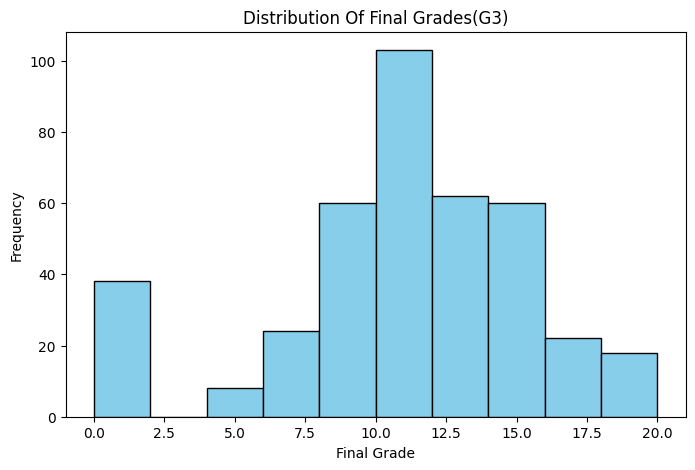

In [18]:
plt.figure(figsize=(8,5))
plt.hist(data['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution Of Final Grades(G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()


# (b) Plot a Scatter plot between study time and final grade (G3)
---



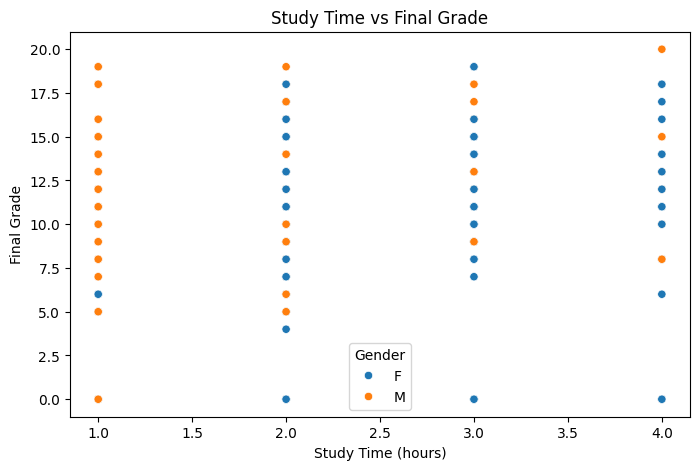

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x= 'studytime', y='G3', hue='sex')
plt.title("Study Time vs Final Grade")
plt.xlabel("Study Time (hours)")
plt.ylabel("Final Grade")
plt.legend(title="Gender")
plt.show()


# (c) Plot a Bar Chart comparing the average scores of male and female students
---



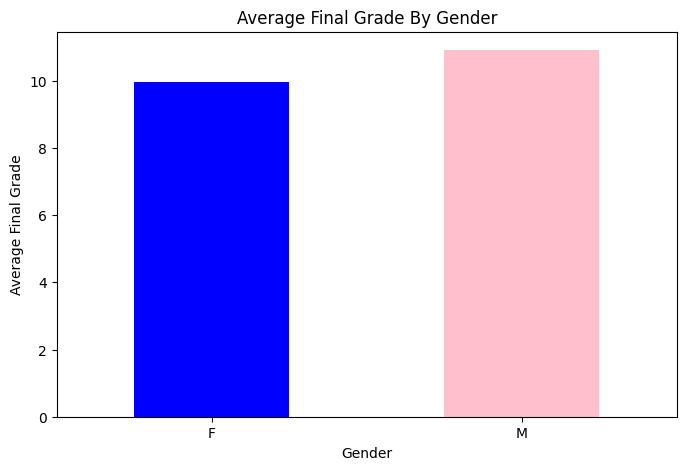

In [20]:
plt.figure(figsize=(8,5))
average_grade_by_gender.plot(kind='bar', color=['blue','pink'])
plt.title("Average Final Grade By Gender")
plt.ylabel("Average Final Grade")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()